In [1]:
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm
import numpy as np
from   scipy.stats import norm


<class 'list'>


In [95]:
data = []
f = open("Synthetic_Sin+anom/varNoise_fixedNumberAnomaliesfixedLength/SinusRW_Length_112000_AnomalyL_200_AnomalyN_60_NoisePerc_5.ts", "r")
data = f.read()
data = (data.rstrip().split('\n')) 
data = [float(i) for i in data]
f.close()
cpts = []
f = open("Synthetic_Sin+anom/varNoise_fixedNumberAnomaliesfixedLength/SinusRW_Length_112000_AnomalyL_200_AnomalyN_60_NoisePerc_5_Annotations.txt", "r")
cpts = f.read()
cpts = (cpts.rstrip().split('\n')) 
cpts = [int(i) for i in cpts]
f.close()

In [12]:
# Read in NAB data
f = open("NAB/data/realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv")
data = f.read()
print(data)
#print(data.shape)

timestamp,value
2014-04-10 00:04:00,91.958
2014-04-10 00:09:00,94.79799999999999
2014-04-10 00:14:00,92.208
2014-04-10 00:19:00,93.72200000000001
2014-04-10 00:24:00,93.042
2014-04-10 00:29:00,92.958
2014-04-10 00:34:00,95.708
2014-04-10 00:39:00,95.25
2014-04-10 00:44:00,94.458
2014-04-10 00:49:00,92.75
2014-04-10 00:54:00,94.208
2014-04-10 00:59:00,92.75
2014-04-10 01:04:00,94.376
2014-04-10 01:09:00,92.792
2014-04-10 01:14:00,91.666
2014-04-10 01:19:00,87.542
2014-04-10 01:24:00,90.75
2014-04-10 01:29:00,91.65
2014-04-10 01:34:00,90.06200000000004
2014-04-10 01:39:00,93.416
2014-04-10 01:44:00,89.904
2014-04-10 01:49:00,90.542
2014-04-10 01:54:00,90.62799999999999
2014-04-10 01:59:00,91.166
2014-04-10 02:04:00,90.5
2014-04-10 02:09:00,89.166
2014-04-10 02:14:00,90.292
2014-04-10 02:19:00,90.208
2014-04-10 02:24:00,93.626
2014-04-10 02:29:00,93.624
2014-04-10 02:34:00,93.756
2014-04-10 02:39:00,93.542
2014-04-10 02:44:00,92.042
2014-04-10 02:49:00,90.93799999999999
2014-04-10 02:54:0

In [96]:
data = data[:1000]

In [97]:
cpts = cpts[:1]

In [98]:
cpts

[35]

In [100]:
type(data)

list

In [136]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import bocd
import csv


In [195]:
#f = open("Synthetic_Sin+anom/varNoise_fixedNumberAnomaliesfixedLength/SinusRW_Length_112000_AnomalyL_200_AnomalyN_60_NoisePerc_5.ts", "r")
#f = open("RealDatasets/MBA_ECG_801.ts", "r")
#f = open("lga.csv", "r")
test_signal = []
with open('lga.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if row[0] == 'LGA':
            test_signal.append(row)
        
# test_signal = []
# data = f.readlines()
# for d in data:
#     test_signal.append(d)
test_signal = np.asarray(test_signal)
print(len(test_signal))
print(test_signal[0])
test_signal = test_signal[:,-1]
test_signal = test_signal[1:]
test_signal = test_signal.astype(np.float)
test_signal = np.flip(test_signal)

test_signal = (test_signal - np.mean(test_signal)) / np.std(test_signal)
print(test_signal[1])


print(test_signal.shape)

# test_signal = test_signal[1200:1400]
# f.close()

468
['LGA' '2015' 'Jan' '1721701' '110101' '1831802']
-1.7012599691365304
(467,)


In [224]:
import json

with open('gdp_argentina.json') as f:
  data = json.load(f)

test_signal = data['series'][0]['raw']
test_signal = np.asarray(test_signal)
test_signal = test_signal.astype(np.float)

test_signal = (test_signal - np.mean(test_signal)) / np.std(test_signal)
print(test_signal)

[-1.40942684 -1.34892917 -1.35894109 -1.42078509 -1.30902541 -1.18060872
 -1.18947147 -1.14687313 -1.08046083 -0.94073239 -0.89251148 -0.80019932
 -0.77212854 -0.72287002 -0.62319862 -0.62373868 -0.66209087 -0.53298284
 -0.62270089 -0.42833484 -0.3965061  -0.50691893 -0.52175782 -0.43467813
 -0.40186023 -0.51197895 -0.38817126 -0.3303997  -0.35430856 -0.5095928
 -0.55929271 -0.37985317 -0.20966541 -0.01972786  0.12642691  0.0510165
  0.19333007  0.41373457  0.52684289  0.42355767  0.40030141  0.27137333
 -0.03316898  0.18694741  0.43173505  0.6933673   0.9522743   1.2654056
  1.41915091  1.18577411  1.56140424  1.80669037  1.76223921  1.86533731
  1.75504997  1.87191786  1.7804682   1.89533702  1.78420865]


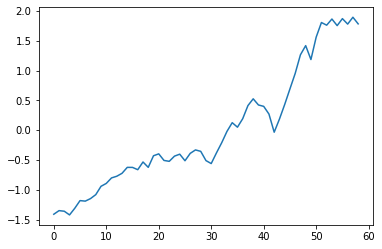

In [225]:
#print(test_signal[:100])
# Generate test data
# test_signal = np.concatenate(
#     [np.random.normal(0.1, 1.0, 300), 
#      np.random.normal(2.0, 0.8, 300),
#      np.random.normal(1.0, 0.5, 300),
#      np.random.normal(3.0, 1.0, 300)])
plt.plot(test_signal)

In [214]:
# Initialize object
bc = BayesianOnlineChangePointDetection(ConstantHazard(200), StudentT(mu=0, kappa=1, alpha=1, beta=1))

# Online estimation and get the maximum likelihood r_t at each time point
rt_mle = np.empty(test_signal.shape)
for i, d in enumerate(test_signal):
    if i >=0:
        #print(i)
        bc.update(test_signal[i-0:i+1])
        rt_mle[i] = bc.rt
        
        #bc.update(test_signal[i])
        #rt_mle[i] = bc.rt
    else:
        bc.update(d)
        rt_mle[i] = 0
    
    
    
    

alpha =  0.01  Beta =  0.01  kappa =  0.01


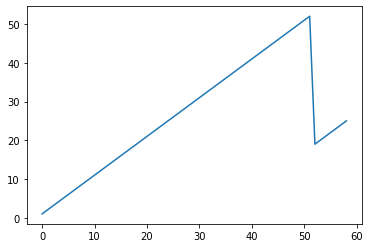

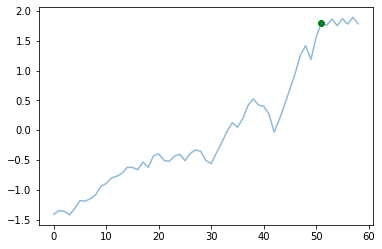

alpha =  0.01  Beta =  0.01  kappa =  1


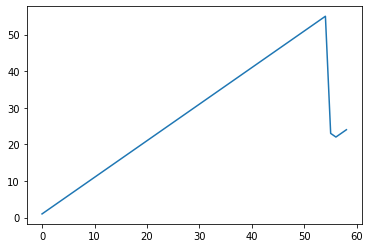

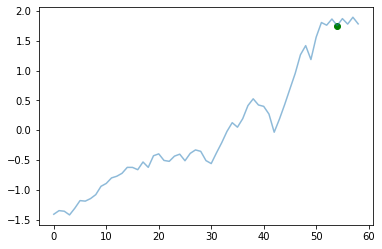

alpha =  0.01  Beta =  0.01  kappa =  100


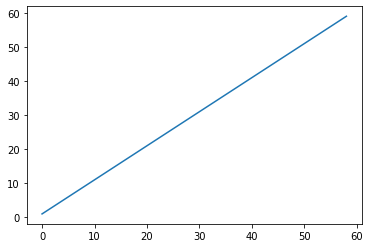

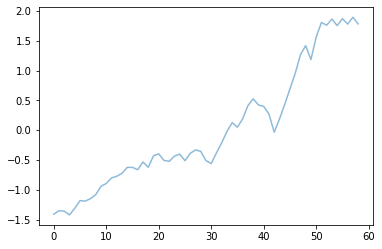

alpha =  0.01  Beta =  1  kappa =  0.01


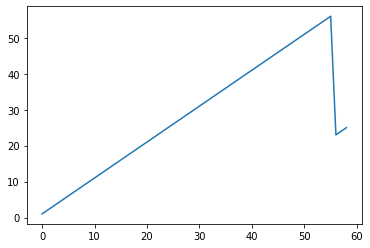

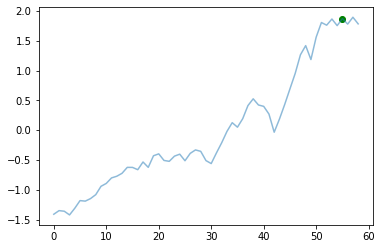

alpha =  0.01  Beta =  1  kappa =  1


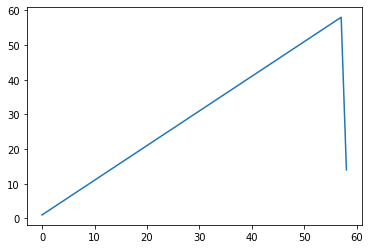

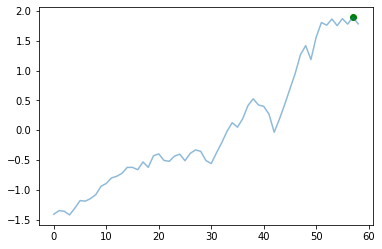

alpha =  0.01  Beta =  1  kappa =  100


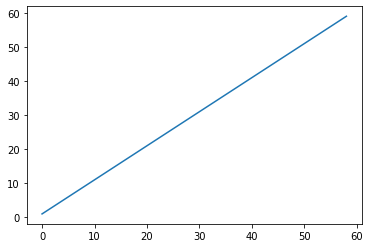

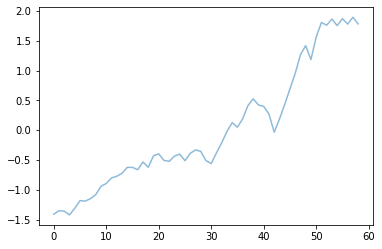

alpha =  0.01  Beta =  100  kappa =  0.01


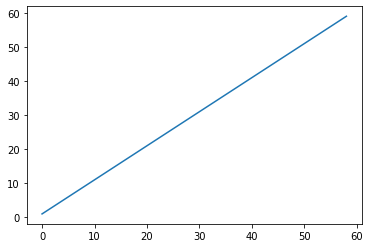

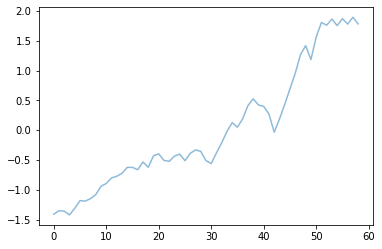

alpha =  0.01  Beta =  100  kappa =  1


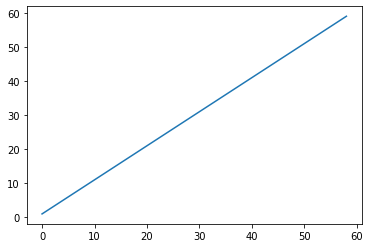

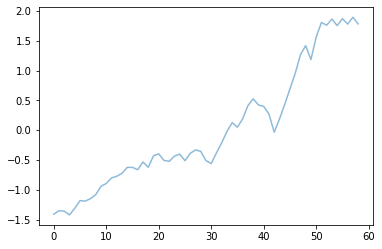

alpha =  0.01  Beta =  100  kappa =  100


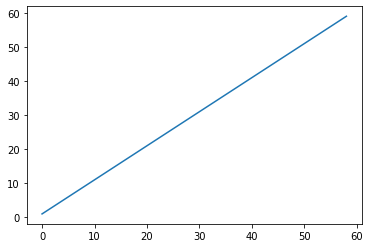

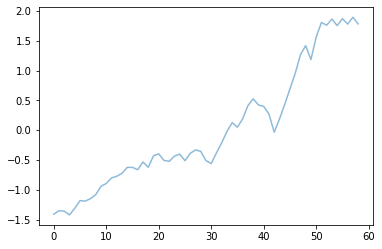

alpha =  1  Beta =  0.01  kappa =  0.01


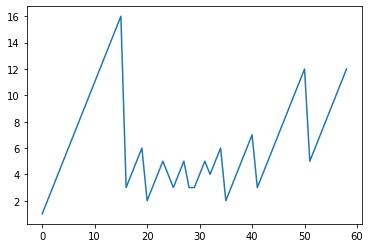

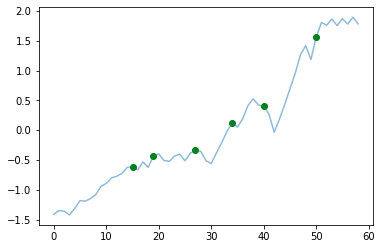

alpha =  1  Beta =  0.01  kappa =  1


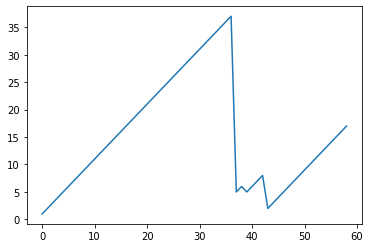

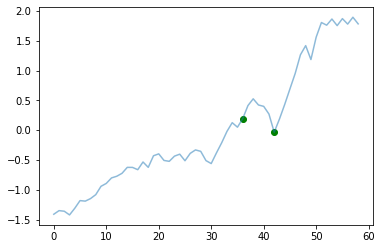

alpha =  1  Beta =  0.01  kappa =  100


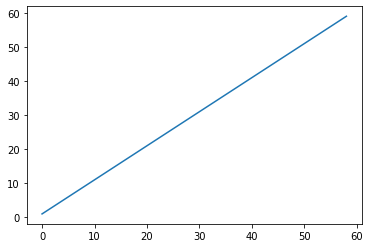

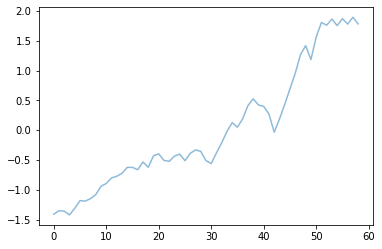

alpha =  1  Beta =  1  kappa =  0.01


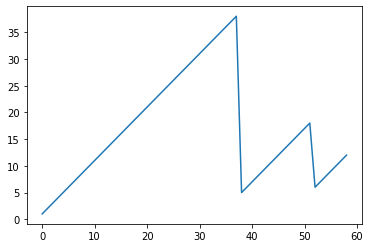

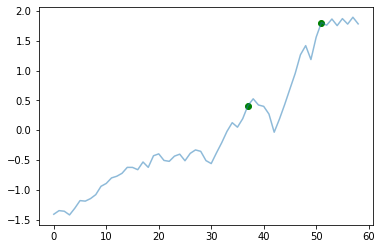

alpha =  1  Beta =  1  kappa =  1


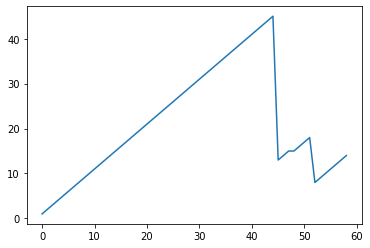

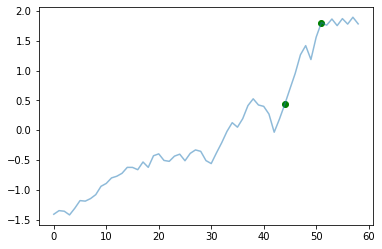

alpha =  1  Beta =  1  kappa =  100


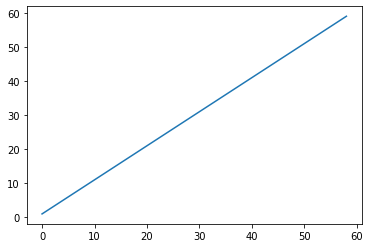

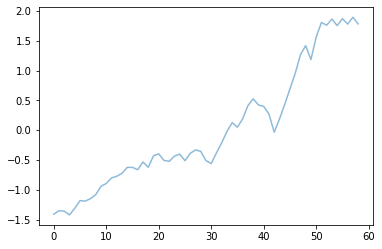

alpha =  1  Beta =  100  kappa =  0.01


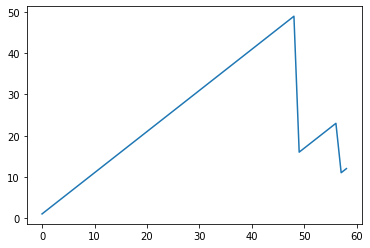

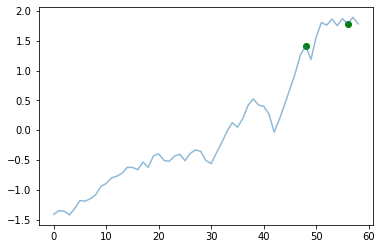

alpha =  1  Beta =  100  kappa =  1


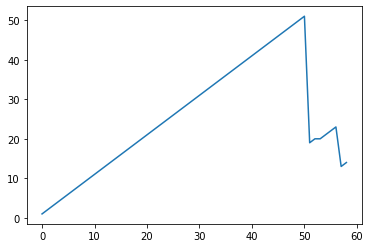

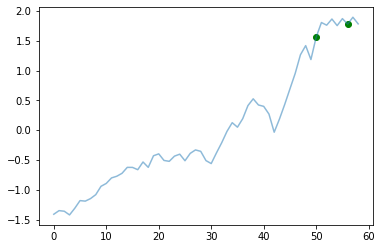

alpha =  1  Beta =  100  kappa =  100


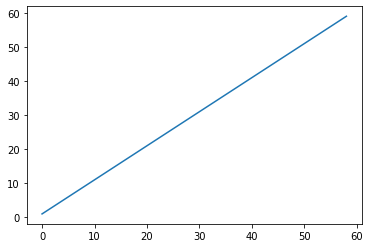

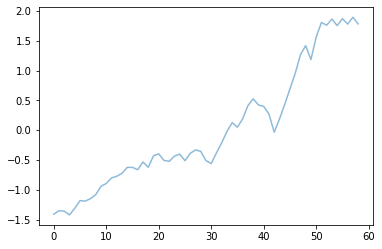

alpha =  100  Beta =  0.01  kappa =  0.01


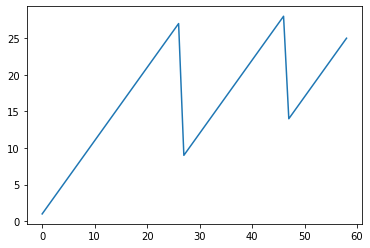

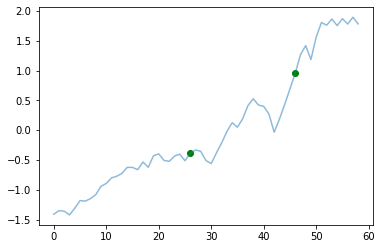

alpha =  100  Beta =  0.01  kappa =  1


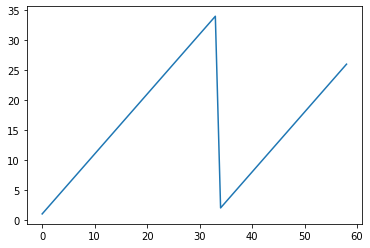

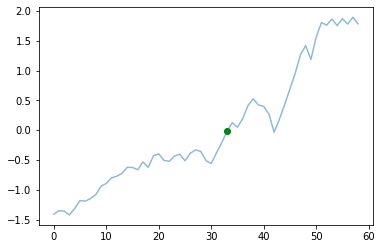

alpha =  100  Beta =  0.01  kappa =  100


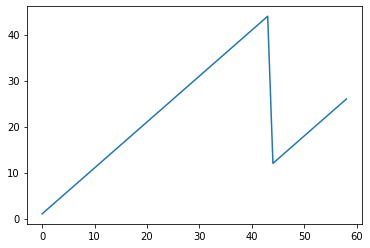

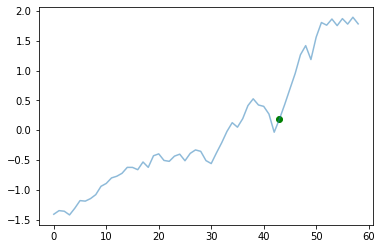

alpha =  100  Beta =  1  kappa =  0.01


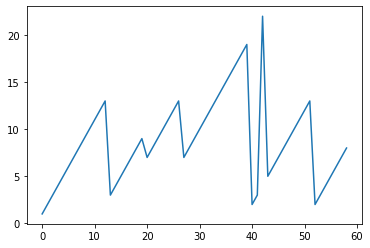

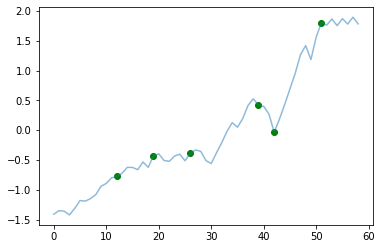

alpha =  100  Beta =  1  kappa =  1


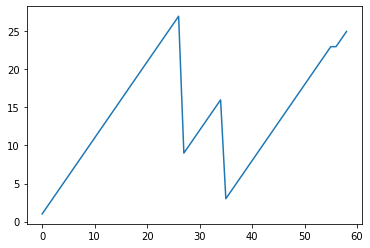

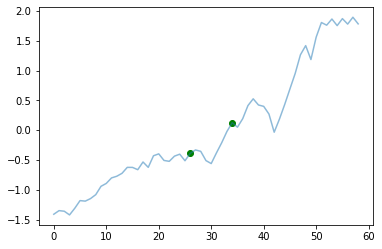

alpha =  100  Beta =  1  kappa =  100


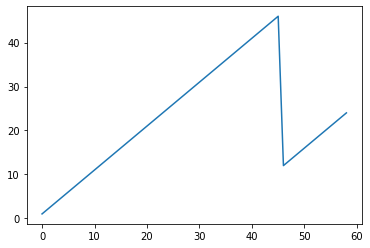

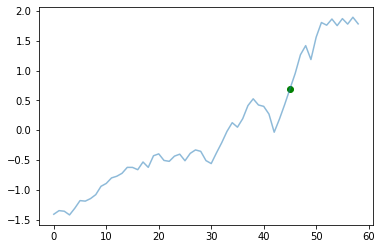

alpha =  100  Beta =  100  kappa =  0.01


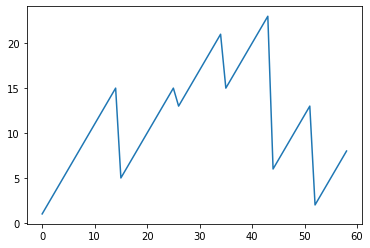

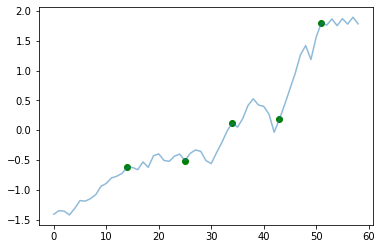

alpha =  100  Beta =  100  kappa =  1


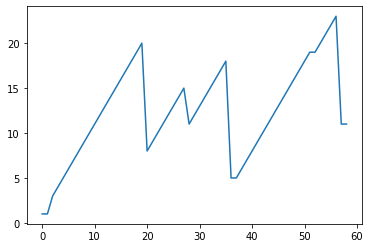

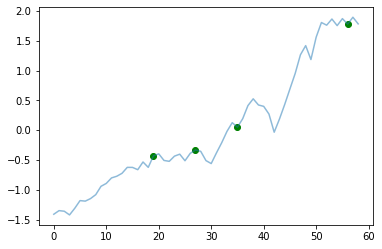

alpha =  100  Beta =  100  kappa =  100


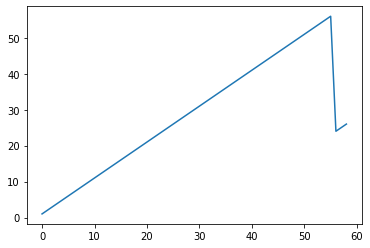

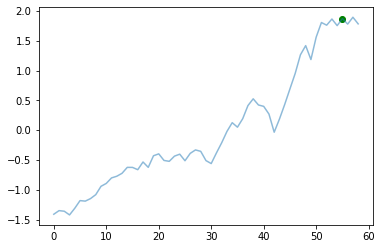

In [230]:
alpha = [0.01,1,100]
beta = [0.01,1,100]
kappa = [0.01,1,100]
L=0

for a in alpha:
    for b in beta:
        for k in kappa:
            # Initialize object
            bc = BayesianOnlineChangePointDetection(ConstantHazard(50), StudentT(mu=0, kappa=k, alpha=a, beta=b))



            # Online estimation and get the maximum likelihood r_t at each time point
            rt_mle = np.empty(test_signal.shape)
            for i, d in enumerate(test_signal):
                if i >=L:
                    #print(i)
                    bc.update(test_signal[i-L:i+1])
                    #print(bc.rt)
                    rt_mle[i] = bc.rt

                    #bc.update(test_signal[i])
                    #rt_mle[i] = bc.rt
                else:
                    bc.update(d)
                    rt_mle[i] = 0
                    
            print("alpha = ", a, " Beta = ", b, " kappa = ", k)
            plt.plot(rt_mle)
            plt.show()
            # Plot data with estimated change points
            plt.plot(test_signal, alpha=0.5, label="observation")
            index_changes = np.where(np.diff(rt_mle)<-1)[0]
            plt.scatter(index_changes, test_signal[index_changes], c='green', label="change point")
            plt.show()




In [ ]:

import json

with open('path_to_file/person.json') as f:
  data = json.load(f)

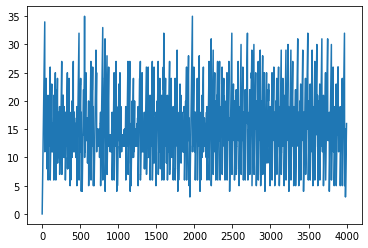

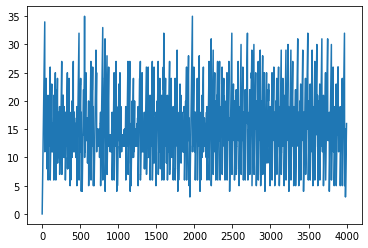

In [104]:

plt.show()
plt.plot(rt_mle)
plt.show()

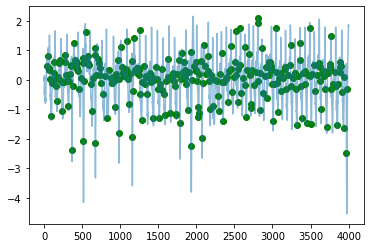

In [102]:
# Plot data with estimated change points
plt.plot(test_signal, alpha=0.5, label="observation")
index_changes = np.where(np.diff(rt_mle)<-1)[0]
plt.scatter(index_changes, test_signal[index_changes], c='green', label="change point")

In [206]:
import numpy as np


class BayesianOnlineChangePointDetection:
    def __init__(self, hazard, distribution):
        self.hazard = hazard
        self.distribution = distribution
        self.T = 0
        self.beliefs = np.zeros((1, 2),dtype=np.float64)
        self.beliefs[0, 0] = 1.0

    def reset_params(self):
        self.T = 0
        self.beliefs = np.zeros((1, 2))
        self.beliefs[0, 0] = 1.0

    def _expand_belief_matrix(self):
        rows = np.zeros((1, 2),dtype=np.float64)
        self.beliefs = np.concatenate((self.beliefs, rows), axis=0)

    def _shift_belief_matrix(self):
        self.beliefs[:, 0] = self.beliefs[:, 1]
        self.beliefs[:, 1] = 0.0

    def update(self, x):
        
        
        # Evaluate Predictive Probability (3 in Algortihm 1)
        if type(x) is not np.ndarray:
            self._expand_belief_matrix()

            self.distribution.update_params(x)
            # Update internal state
            #print(len(self.beliefs))

            self.T += 1
        else:
            self._expand_belief_matrix()

            pi_t = self.distribution.pdf(x)
            # Calculate H(r_{t-1})
            h = self.hazard(self.rt)

            # Calculate Growth Probability (4 in Algorithm 1)
            #print(pi_t)
            #print(len(self.beliefs))
            #print(self.beliefs)
            self.beliefs[1 : self.T + 2, 1] = self.beliefs[: self.T + 1, 0] * pi_t * (1 - h)

            # Calculate Changepoint Probabilities (5 in Algorithm 1)
            self.beliefs[0, 1] = (self.beliefs[: self.T + 1, 0] * pi_t * h).sum()

            # Determine Run length Distribution (7 in Algorithm 1)
            self.beliefs[:, 1] = self.beliefs[:, 1] / self.beliefs[:, 1].sum()

            # Update sufficient statistics (8 in Algorithm 8)
            self.distribution.update_params(x[-1])

            # Update internal state
            self._shift_belief_matrix()
            self.T += 1
            
            
        
        
    @property
    def rt(self):
        return np.where(self.beliefs[:, 0] == self.beliefs[:, 0].max())[0]

    @property
    def belief(self):
        return self.beliefs[:, 0]


In [207]:
import numpy as np


class Hazard:
    def __call__(self, *args, **kwargs):
        raise NotImplementedError()


class ConstantHazard(Hazard):
    def __init__(self, _lambda):
        self._lambda = _lambda

    def __call__(self, r):
        """
        Args:
          r: The length of the current run (np.ndarray or scalar)

        Returns:
          p: Changepoint Probabilities(np.ndarray with shape = r.shape)
        """
        if isinstance(r, np.ndarray):
            shape = r.shape
        else:
            shape = 1

        return np.ones(shape) / self._lambda


In [210]:
import numpy as np
from scipy import stats


class Distribution:
    def reset_params(self):
        raise NotImplementedError()

    def pdf(self, x):
        raise NotImplementedError()

    def update_params(self, x):
        raise NotImplementedError()


class StudentT(Distribution):
    """ Generalized Student t distribution 
    https://en.wikipedia.org/wiki/Student%27s_t-distribution#Generalized_Student's_t-distribution

    This setting corresponds to select
      1: Gaussian distribution as a likelihood
      2: normal-Gamma distribution as a prior for Gaussian
    """

    def __init__(self, mu=0, kappa=1, alpha=1, beta=1):
        self.mu0 = np.array([mu],dtype=np.float64)
        self.kappa0 = np.array([kappa],dtype=np.float64)
        self.alpha0 = np.array([alpha],dtype=np.float64)
        self.beta0 = np.array([beta],dtype=np.float64)
        # We need the following lines to prevent "outside defined warning"
        self.muT = self.mu0.copy()
        self.kappaT = self.kappa0.copy()
        self.alphaT = self.alpha0.copy()
        self.betaT = self.beta0.copy()

    def reset_params(self):
        self.muT = self.mu0.copy()
        self.kappaT = self.kappa0.copy()
        self.alphaT = self.alpha0.copy()
        self.betaT = self.beta0.copy()

    def pdf(self, x):
        """ Probability Density Function
        """
        #print(x)
        #print()
        #return stats.t.pdf(x, loc=self.muT, df=2 * self.alphaT, scale=np.sqrt(self.betaT * (self.kappaT + 1) / (self.alphaT * self.kappaT)),)
        probs = []
        for xd in x:
            probs.append(stats.t.pdf(xd, loc=self.muT, df=2 * self.alphaT, scale=np.sqrt(self.betaT * (self.kappaT + 1) / (self.alphaT * self.kappaT)),))
        
        ans = np.zeros(len(probs[0]),dtype=np.float64)
        for pro in probs:
            for i in range(len(pro)):
                ans[i] += pro[i]
        ans /= len(probs[0])
        #print(ans)
        return ans
        #return stats.t.pdf(x, loc=self.muT, df=2 * self.alphaT, scale=np.sqrt(self.betaT * (self.kappaT + 1) / (self.alphaT * self.kappaT)),)

    def update_params(self, x):
        """Update Sufficient Statistcs (Parameters)

        To understand why we use this, see e.g.
        Conjugate Bayesian analysis of the Gaussian distribution, Kevin P. Murphy∗
        https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf
        3.5 Posterior predictive
        """
        self.betaT = np.concatenate(
            [
                self.beta0,
                (self.kappaT + (self.kappaT * (x - self.muT) ** 2) / (2 * (self.kappaT + 1))),
            ]
        )
        self.muT = np.concatenate([self.mu0, (self.kappaT * self.muT + x) / (self.kappaT + 1)])
        self.kappaT = np.concatenate([self.kappa0, self.kappaT + 1])
        self.alphaT = np.concatenate([self.alpha0, self.alphaT + 0.5])
